# Hi Guys today we will see what is the 😍 advantage of using GPU's for DEEP LEARNING

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.4.1


In [2]:
tf.config.experimental.list_physical_devices(device_type=None)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#  Check the GPU stats

## 🔥 If using this in kaggle notebook, don't forget to connect to GPU Accelerator 🌌

In [3]:
!nvidia-smi

Fri Aug 13 14:15:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

The output of the below cell should be 
**1 Physical GPUs, 1 Logical GPUs**

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [6]:
import numpy as np                                
import matplotlib.pyplot as plt
import tensorflow.keras as k
# from tensorflow.examples.tutorials.mnist import input_data
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
import time

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28,28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_test=x_test.astype('float32')
x_train=x_train.astype('float32')
mean=np.mean(x_train)
std=np.std(x_train)
x_test = (x_test-mean)/std
x_train = (x_train-mean)/std

print("counts of x_train : {}, y_train : {}, x_test : {}, y_test : {}".format(
    len(x_train), len(y_train), len(x_test), len(y_test)))

11493376/11490434 [==============================] - 0s 0us/step
counts of x_train : 60000, y_train : 60000, x_test : 10000, y_test : 10000


In [8]:
num_classes=10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("counts of x_train : {}, y_train : {}, x_test : {}, y_test : {}".format(
    len(x_train), len(y_train), len(x_test), len(y_test)))

counts of x_train : 60000, y_train : 60000, x_test : 10000, y_test : 10000


In [9]:
optimizer = tf.keras.optimizers.SGD()

# CPU ONLY

In [10]:
# don't change anything
num_filter=32
num_dense=512
drop_dense=0.7
ac='relu'
learningrate=0.001

with tf.device("/cpu:0"):
    model = Sequential()

    model.add(Conv2D(num_filter, (3, 3), activation=ac, input_shape=(28, 28, 1),padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(num_filter, (3, 3), activation=ac,padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 14x14x32

    model.add(Conv2D(2*num_filter, (3, 3), activation=ac,padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(2*num_filter, (3, 3), activation=ac,padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 7x7x64 = 3136 neurons

    model.add(Flatten())                        
    model.add(Dense(num_dense, activation=ac))
    model.add(BatchNormalization())
    model.add(Dropout(drop_dense))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)

In [11]:
cpu_list=[]
batch_sizes = []
with tf.device("/cpu:0"):
    for i in range(0,7):
        k=8*2**i
        print("batch size "+str(k))
        t1 = time.time()
        model.fit(x_train, y_train, batch_size=k, epochs=1, validation_data=(x_test, y_test))
        t2 = time.time()
        cpu_list.append(int(t2-t1))
        batch_sizes.append(k)

batch size 8
7500/7500 [==============================] - 281s 37ms/step - loss: 0.3777 - accuracy: 0.8872 - val_loss: 0.0326 - val_accuracy: 0.9883
batch size 16
3750/3750 [==============================] - 252s 67ms/step - loss: 0.0704 - accuracy: 0.9787 - val_loss: 0.0267 - val_accuracy: 0.9905
batch size 32
1875/1875 [==============================] - 235s 125ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0205 - val_accuracy: 0.9925
batch size 64
938/938 [==============================] - 235s 251ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0192 - val_accuracy: 0.9928
batch size 128
469/469 [==============================] - 223s 476ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.0188 - val_accuracy: 0.9929
batch size 256
235/235 [==============================] - 220s 937ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0186 - val_accuracy: 0.9934
batch size 512
118/118 [==============================] - 239s 2s/step - loss: 0.0253 - accuracy: 0.9

In [12]:
print(cpu_list)

[281, 252, 235, 235, 223, 220, 239]


## For my CPU AMD-Ryzen 9 5900 HX the score (lower is better) is 92
🔥 It takes roughly 92 seconds per epoch, may vary depending on your cpu stats

In [13]:
cpu_score = sum(cpu_list)/len(cpu_list)
cpu_score

240.71428571428572

# GPU ONLY

In [14]:
!nvidia-smi

Fri Aug 13 14:44:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    34W / 250W |    369MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [15]:
num_filter=32
num_dense=512
drop_dense=0.7
ac='relu'
learningrate=0.001

model = Sequential()

model.add(Conv2D(num_filter, (3, 3), activation=ac, input_shape=(28, 28, 1),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filter, (3, 3), activation=ac,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 14x14x32

model.add(Conv2D(2*num_filter, (3, 3), activation=ac,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filter, (3, 3), activation=ac,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 7x7x64 = 3136 neurons

model.add(Flatten())                        
model.add(Dense(num_dense, activation=ac))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)

In [16]:
gpu_list=[]
batch_sizes = []
print("gpu_list : ", gpu_list)
with tf.device("/gpu:0"):
    for i in range(0,7):
        k=8*2**i
        print("batch size "+str(k))
        t1 = time.time()
        model.fit(x_train, y_train, batch_size=k, epochs=1, validation_data=(x_test, y_test))
        t2 = time.time()
        gpu_list.append(int(t2-t1))
        batch_sizes.append(k)

gpu_list :  []
batch size 8
7500/7500 [==============================] - 39s 4ms/step - loss: 0.4000 - accuracy: 0.8823 - val_loss: 0.0549 - val_accuracy: 0.9817
batch size 16
3750/3750 [==============================] - 20s 5ms/step - loss: 0.0697 - accuracy: 0.9791 - val_loss: 0.0235 - val_accuracy: 0.9912
batch size 32
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0210 - val_accuracy: 0.9925
batch size 64
938/938 [==============================] - 6s 7ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0189 - val_accuracy: 0.9933
batch size 128
469/469 [==============================] - 4s 9ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0185 - val_accuracy: 0.9935
batch size 256
235/235 [==============================] - 3s 14ms/step - loss: 0.0277 - accuracy: 0.9914 - val_loss: 0.0180 - val_accuracy: 0.9933
batch size 512
118/118 [==============================] - 3s 23ms/step - loss: 0.0263 - accuracy: 0.9921

In [17]:
gpu_list

[38, 20, 13, 6, 4, 3, 3]

# 🔥 For my GPU NVIDIA-RTX 3060 the score on average is 10
### 🔥 While my CPU took 90 sec per epoch on average, my GPU just finished it in 10 sec

As you can see the GPU is way more faster than CPU, it helps us to **reduce training times** for deep learning models

In [18]:
gpu_score = sum(gpu_list)/len(gpu_list)
gpu_score

12.428571428571429

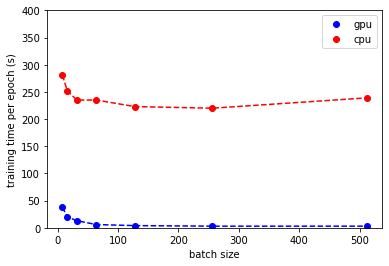

In [19]:
plt.plot(batch_sizes,gpu_list,'bo')
plt.plot(batch_sizes,cpu_list,'ro')
plt.plot(batch_sizes,gpu_list,'b--')
plt.plot(batch_sizes,cpu_list,'r--')
plt.ylabel('training time per epoch (s)')
plt.xlabel('batch size')
plt.legend(['gpu', 'cpu'], loc='upper right')
plt.ylim([0,400])
plt.savefig('CPUvsGPU.png') 
plt.show()

# Don't forget to comment your CPU and GPU scores 😁👯‍